In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  scipy import stats

import seaborn as sns

import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.feature_selection import RFE, RFECV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings('ignore')

In [131]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.drop('UserID', axis = 1, inplace = True)

In [132]:
train

,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...
19531,Never-married,Auto,Infomercial,Male,40,Primetime,United-States,0.027465,High,Yes,0
19532,Never-married,Political,Drama,Female,15,Morning,United-States,0.027465,High,Yes,1
19533,Married-civ-spouse,Other,Comedy,Female,55,Primetime,United-States,0.027465,Low,Yes,0
19534,Never-married,Political,Comedy,Male,38,Primetime,United-States,0.027465,High,Yes,0


In [133]:
test

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,UI_8772,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes
1,UI_13139,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,High,No
3,UI_15503,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,High,Yes
4,UI_16556,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,Low,No
...,...,...,...,...,...,...,...,...,...,...,...
6507,UI_2716,Never-married,Political,Drama,Male,40,Primetime,International,0.027465,Low,Yes
6508,UI_17670,Divorced,Entertainment,Comedy,Female,40,Primetime,United-States,0.027465,Low,Yes
6509,UI_16871,Married-civ-spouse,Pharma,Comedy,Male,40,Primetime,United-States,0.027465,High,Yes
6510,UI_2667,Divorced,Auto,Comedy,Female,35,Primetime,United-States,0.027465,Low,Yes


In [134]:
# 1-hot encoding
to_encode = ['airlocation','money_back_guarantee','targeted_sex','realtionship_status', 'industry', 'genre', 'airtime', 'expensive']
for i in to_encode:
    onehot_df = pd.get_dummies(train[i], drop_first = True, prefix=i, prefix_sep='_')
    train = train.join(onehot_df)
    train.drop(i, axis = 1, inplace = True)


In [135]:
train

,average_runtime(minutes_per_week),ratings,netgain,airlocation_Canada,airlocation_China,airlocation_Columbia,airlocation_Cuba,airlocation_Dominican-Republic,airlocation_Ecuador,airlocation_El-Salvador,...,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,airtime_Morning,airtime_Primetime,expensive_Low,expensive_Medium
0,40,0.027465,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,35,0.027465,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,40,0.027465,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,40,0.027465,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0
4,50,0.027465,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19531,40,0.027465,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
19532,15,0.027465,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
19533,55,0.027465,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
19534,38,0.027465,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [136]:
#x,l = stats.boxcox(train['average_runtime(minutes_per_week)'])

In [137]:
#train['average_runtime(minutes_per_week)'] = x

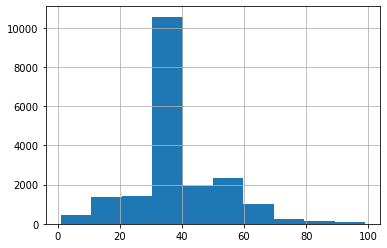

In [138]:
train['average_runtime(minutes_per_week)'].hist()

In [139]:
# encoding
'''train.targeted_sex = train.targeted_sex.apply(lambda x: 1 if x == 'Male' else 0)
train.money_back_guarantee = train.money_back_guarantee.apply(lambda x: 1 if x == 'Yes' else 0)

le = LabelEncoder()
train.airlocation = le.fit_transform(train.airlocation)'''

"train.targeted_sex = train.targeted_sex.apply(lambda x: 1 if x == 'Male' else 0)\ntrain.money_back_guarantee = train.money_back_guarantee.apply(lambda x: 1 if x == 'Yes' else 0)\n\nle = LabelEncoder()\ntrain.airlocation = le.fit_transform(train.airlocation)"

In [140]:
#train.drop(['industry_Pharma','airtime_Primetime'], axis = 1, inplace = True)

In [141]:
X = train.drop('netgain', axis =1)
y = train['netgain'].copy()

In [142]:
# Feature Scaling
ss = StandardScaler()
    
X = ss.fit_transform(X)

In [143]:
# Find correlated Features
correl = train.corr()
for i in range(correl.shape[0]):
    for j in range(correl.shape[1]):
        if (abs(correl.iloc[i,j]) > 0.8) & ( i != j):
            print(round(correl.iloc[i,j], 4), 'between ',correl.columns[j], '   &   ', correl.index[i], ' ')

0.8826 between  industry_Pharma    &    realtionship_status_Married-civ-spouse  
0.8826 between  realtionship_status_Married-civ-spouse    &    industry_Pharma  
-0.8576 between  airtime_Primetime    &    airtime_Morning  
-0.8576 between  airtime_Morning    &    airtime_Primetime  


In [144]:
#rfecv
# Feature Elimination using rfe with RandomForestEstimator
rf=RandomForestClassifier()
rfecv = RFECV(estimator = rf, step = 1, verbose =20, scoring = 'f1', n_jobs = -1)
rfecv.fit(X,y)

selected_fs = pd.DataFrame({'features': train.drop('netgain', axis = 1).columns,
                           'ranks': rfecv.ranking_})
selected_fs = selected_fs.sort_values(by = 'ranks')

print('Number of selected Features by RFE = ', selected_fs[selected_fs['ranks'] == 1].shape[0], 'out of 64 features.')

Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 fe

In [145]:
selected_fs.iloc[:22,:]

,features,ranks
0,average_runtime(minutes_per_week),1
1,ratings,1
61,airtime_Primetime,1
60,airtime_Morning,1
54,industry_Pharma,1
53,industry_Other,1
48,realtionship_status_Never-married,1
46,realtionship_status_Married-civ-spouse,1
43,money_back_guarantee_Yes,2
44,targeted_sex_Male,3


In [146]:
X_rfecv = rfecv.transform(X)

In [147]:
# SMOTE Oversampling
smte = SMOTE()
X_os, y_os = smte.fit_resample(X_rfecv,y)

In [148]:
# k-fold cross validation for Ridge, RandomForestRegressor & XGBoost.
lr_cv = LogisticRegression()
rf_cv = RandomForestClassifier(n_jobs = 4)
xgb_cv = XGBClassifier()

scoring_fn = 'f1'
print('F1')
cv_en = cross_val_score(lr_cv, X_os, y_os, cv = 8, scoring = scoring_fn).mean()
print('For Logistic :', cv_en)

cv_rf = cross_val_score(rf_cv, X_os, y_os, cv = 8, scoring = scoring_fn).mean()
print('For RandomForest :', cv_rf)

cv_xgb = cross_val_score(xgb_cv, X_os, y_os, cv = 8, scoring = scoring_fn).mean()
print('For XGBoost :', cv_xgb)

F1
For Logistic : 0.7911170871357335
For RandomForest : 0.8119074445031093
For XGBoost : 0.8113797649703609


In [ ]:
F1
For Logistic : 0.7957733285194855
For RandomForest : 0.8314856040960051
For XGBoost : 0.8411124721906131

In [30]:
# Hyper-parameter Tuning xgboost
grid = {
    'max_depth' : [6],'min_child_weight' : [1],
    'n_estimators' : [5000],#150
    'gamma' : [0.001],
    'subsample':[0.8], 'colsample_bytree':[0.5],
    'reg_alpha':[0],
    'learning_rate' : [0.01]
}
gs_xgb = GridSearchCV(XGBClassifier(), grid, n_jobs=-1, verbose=2,scoring='f1',return_train_score=True)
gs_xgb.fit(X_os, y_os)
print(gs_xgb.best_params_)
print(gs_xgb.best_score_)
print(gs_xgb.cv_results_['mean_train_score'].mean())

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 22.3min finished


{'colsample_bytree': 0.5, 'gamma': 0.001, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 5000, 'reg_alpha': 0, 'subsample': 0.8}
0.8430713537090169
0.8654607533995625


In [ ]:
{}
0.8409790979860127
0.8627482707158458
{'n_estimators': 150}
0.8434888705258821
0.8666659011334577
{'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 150}
0.8434888705258821
0.8666659011334577
{'gamma': 0.001, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 150}
0.8436476477897505
0.8539509913194214
{'colsample_bytree': 0.5, 'gamma': 0.001, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.8}
0.8438195188626129
0.8653300420466136

In [149]:
# Test
test = pd.read_csv('test.csv')
test.drop('UserID', axis = 1, inplace = True)

In [150]:
to_encode = ['airlocation','money_back_guarantee','targeted_sex','realtionship_status', 'industry', 'genre', 'airtime', 'expensive']
for i in to_encode:
    onehot_df = pd.get_dummies(test[i], drop_first = True, prefix=i, prefix_sep='_')
    test = test.join(onehot_df)
    test.drop(i, axis = 1, inplace = True)

In [151]:
#x,l = stats.boxcox(test['average_runtime(minutes_per_week)'])
#test['average_runtime(minutes_per_week)'] = x

In [152]:
#test.drop(['industry_Pharma','airtime_Primetime'], axis = 1, inplace = True)

In [153]:
test2 = test.iloc[:,:39]
test2['airlocation_Trinadad&Tobago'] = 0
test2=test2.join(test.iloc[:,39:])

In [154]:
test = ss.transform(test2)
test_rfe = rfecv.transform(test)

In [155]:
test_pred_xgb = XGBClassifier().fit(X_os,y_os).predict(test_rfe)

In [129]:
subm = pd.DataFrame({'netgain':test_pred_xgb})
subm.to_csv('sub21_xgb_smote.csv', index = False)

In [41]:
test_rfe.shape


(6512, 9)

In [43]:
X_os.shape

(29772, 64)